## Text Classification - Suspicious Transaction Report and Suspicious Activity Report

### Introduction: Text Analytics on Suspicious Transaction Reports


In the modern financial world, organizations and institutions generate vast amounts of textual data in the form of transaction reports, customer communications, and regulatory submissions. This data, while rich in information, can be overwhelming to analyze manually. Leveraging computational methods to extract insights becomes not just advantageous but essential. The focus of this project is to conduct text analytics, specifically targeting Suspicious Transaction Reports (STRs), Suspicious Activity Reports (SARs), and Suspicious Transaction and Activity Reports (STARs).

The primary objectives of this project are:

1. Topic Modeling: To uncover the underlying themes or topics within the reports. By doing so, we aim to provide a concise summary of the primary subjects present in the dataset.

2. Text Classification: To categorize reports into pertinent categories, namely Money Laundering (ML), Terrorism Financing (TF), and Proliferation Financing (PF). This classification aids in  streamlining further investigations and actions based on the nature of the suspicious activity.

To achieve these objectives, we employ a combination of traditional machine learning techniques, keyword-based labeling, and advanced natural language processing tools. The project offers a blend of exploratory data analysis and predictive modeling, with the ultimate goal of enhancing the efficiency and effectiveness of financial oversight.

### *Assumptions on the Project:*

1. Labeling Mechanism: The keywords or rules used to initially label the data (e.g., for Money Laundering, Terrorism Financing, etc.) are adequate and cover most cases.

2. Generalizability: The trained text classification model will be able to generalize and categorize new, unseen financial reports correctly.

3. Text as Primary Data: The textual content of the reports provides sufficient information for classification and analysis, without needing supplementary structured numeric data. 

4. Static Environment: The nature and structure of suspicious reports won't drastically change in the near future. This means the model and insights derived now will remain relevant for some time.

5. Analysis Goals: The primary goal of the project is to categorize reports and identify underlying topics. Advanced analytics, like predicting future trends or detecting sophisticated financial crimes, might require additional data and methodologies.


### *Scope:*

1. Data Understanding and Preparation:

Load and preprocess reports for text analytics.
Understand the distribution and nature of reports in terms of length and content.

2. Topic Discovery:

Uncover underlying topics or themes present in the dataset to provide a concise summary of the primary subjects present.

3. Text Classification:

Categorize reports into pertinent categories, namely Money Laundering (ML), Terrorism Financing (TF), and Proliferation Financing (PF).
Train a classifier to streamline further investigations and actions based on the nature of suspicious activities.

4. Data Visualization:

Create visual representations of the data to provide insights into report distribution, prominent words, and report structure.

### *Research Questions:*

1. What are the main topics discussed in the financial reports?

Can we identify specific themes or subjects that are frequently mentioned in the dataset?

2. How are reports distributed across the categories of Money Laundering (ML), Terrorism Financing (TF), and Proliferation Financing (PF)?

Are there certain categories that are more prevalent than others in the dataset?

3. Can we effectively train a machine learning model to classify new reports into the aforementioned categories?

How well does the model generalize to unseen reports?
What features or words play a significant role in determining the category of a report?

4. What are the common words or phrases associated with each category?

Are there specific terminologies or phrases that are indicative of Money Laundering, Terrorism Financing, or Proliferation Financing?

5. What is the structure of the reports in terms of length and content?

Are most reports detailed and lengthy, or are they concise and to the point?

#### Library installations

In [1]:
# Step 1: Installing and Loading Libraries

# Install libraries (execute this in your local environment)
# !pip install pandas
# !pip install nltk

     ---------------------------------------- 1.5/1.5 MB 396.8 kB/s eta 0:00:00
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/e6/7c/96a44dabe8577f43ac34e34d0ac098ee42390a06fee4cbe8b5317ecf2520/regex-2023.8.8-cp310-cp310-win_amd64.whl.metadata
     -------------------------------------- 42.0/42.0 kB 407.5 kB/s eta 0:00:00
   -------------------------------------- 268.3/268.3 kB 550.3 kB/s eta 0:00:00


In [8]:
# !pip install wordcloud
# !pip install sklearn

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/5a/5f/f4164295d6853ec6203bc728dea4da76a7145ba70482eab9e994d26e0e13/wordcloud-1.9.2-cp310-cp310-win_amd64.whl.metadata
   -------------------------------------- 152.1/152.1 kB 909.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [9]:
# !pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/59/ed/548f6f686845d386a727a51a3daa411d95fc599649a2d54705f6773ac259/scikit_learn-1.3.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 9.3/9.3 MB 118.5 kB/s eta 0:00:00


#### Load libraries

In [1]:
# Load libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [2]:
# Download datasets for nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Rick-
[nltk_data]     Royal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rick-
[nltk_data]     Royal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Loading Data

In [3]:
# Step 2: Loading the .txt File
with open(r"C:\Users\Rick-Royal\Documents\Strathmore University Data Science and Analytics\Module 4\Module-IV\Dissertation II\Paper NLP Project\str.txt", "r") as file:
    text_data = file.read()

In [4]:
print(text_data[:1000])

Suspicious Transaction Report (STR) - Domestic Scenario
Paragraph 1: Profile of Customer/Entity Identification Number: XYZ12345 Tax Registration Number: T123456789 Date of Account Opening: 01/15/20XX Account Number: XXXXXXXX Account Signatories: John Doe, Jane Smith
Paragraph 2: Transaction Description A transaction occurred on 08/20/20XX involving a transfer of $50,000 from Account XXXXXXXX to Account YYYYYYYY.
Paragraph 3: Suspicious Transaction Upon analysis, it was observed that the transaction occurred in a manner inconsistent with the customer's typical transaction history. The amount transferred is significantly higher than usual, and the beneficiary of the transfer, Account YYYYYYYY, has no apparent connection to the customer.
Paragraph 4: Basis of Suspicion The sudden and unexplained deviation from the customer's established transaction pattern raises concerns of possible money laundering through the placement stage. The lack of a clear connection between the customer and the 

In [32]:
import os
import re
import csv

# Load the content from 'str_2.txt'
with open(r"C:\Users\Rick-Royal\Documents\Strathmore University Data Science and Analytics\Module 4\Module-IV\Dissertation II\Paper NLP Project\str_2.txt", "r", encoding="utf-8") as file:
    content_latest = file.read()

# Step 1: Extracting the text using the specified delimiters '*' for start of report and '^' for end of report
pattern_reference = r'\*(.*?)\^'
matches_reference = re.findall(pattern_reference, content_latest, re.DOTALL)

# Step 2: Preparing data for CSV
csv_data_reference = []
for match in matches_reference:
    title, content = match.split("#", 1)
    csv_data_reference.append((title.strip(), content.strip()))

# Step 3: Saving the data to a CSV
csv_path_reference = r"C:\Users\Rick-Royal\Downloads\results\reports_reference.csv"
with open(csv_path_reference, "w", encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Title", "Report Content"])
    writer.writerows(csv_data_reference)

# Step 4: Saving each report as an individual document in a corpus directory
corpus_dir_reference = r"C:\Users\Rick-Royal\Downloads\results\corpus_reference"
os.makedirs(corpus_dir_reference, exist_ok=True)
for title, content in csv_data_reference:
    filename = title.replace(" ", "_").replace("-", "_").replace("/", "_")
    with open(f"{corpus_dir_reference}/{filename}.txt", "w", encoding="utf-8") as file:
        file.write(content)


In [33]:
import pandas as pd

# Step 1: Load the CSV file
csv_path = r"C:\Users\Rick-Royal\Downloads\results\reports_reference.csv"
df_reports = pd.read_csv(csv_path)

# Display the first few rows of the dataframe
print(df_reports.head())

# Step 2: Load the corpus (all reports saved as individual documents)
corpus_directory = r"C:\Users\Rick-Royal\Downloads\results\corpus_reference"
file_names = os.listdir(corpus_directory)
corpus = {}

# Reading each file in the corpus directory and storing its content in a dictionary
for file_name in file_names:
    with open(os.path.join(corpus_directory, file_name), "r", encoding="utf-8") as file:
        corpus[file_name] = file.read()

# Displaying the content of the first few files in the corpus for verification
for file_name, content in list(corpus.items())[:5]:
    print(f"\n{file_name}:\n{content[:500]}...")  # Displaying the first 500 characters of each file for brevity


                                               Title  \
0  Suspicious Transaction Report (STR) - Domestic...   
1  Suspicious Activity Report (SAR) - Cross-Borde...   
2  Suspicious Transaction and Activity Report (ST...   
3  Suspicious Transaction Report (STR) - Domestic...   
4  Suspicious Activity Report (SAR) - Cross-Borde...   

                                      Report Content  
0  Paragraph 1: Profile of Customer/Entity Identi...  
1  Paragraph 1: Profile of Customer/Entity Identi...  
2  Paragraph 1: Profile of Customer/Entity Identi...  
3  Paragraph 1: Profile of Customer/Entity Identi...  
4  Paragraph 1: Profile of Customer/Entity Identi...  

Suspicious_Activity_Report_(SAR)___Cross_Border_Forex_Bureau_Scenario.txt:
Paragraph 1: Profile of Customer/Entity Identification Number: FXT98765 Tax Registration Number: T123456789 Date of Customer Relationship Initiated: 07/10/20XX
Paragraph 2: Suspicious Activity Description A customer visited the forex bureau multiple times o

In [34]:
# check first five rows
df_reports.head()

,Title,Report Content
0,Suspicious Transaction Report (STR) - Domestic...,Paragraph 1: Profile of Customer/Entity Identi...
1,Suspicious Activity Report (SAR) - Cross-Borde...,Paragraph 1: Profile of Customer/Entity Identi...
2,Suspicious Transaction and Activity Report (ST...,Paragraph 1: Profile of Customer/Entity Identi...
3,Suspicious Transaction Report (STR) - Domestic...,Paragraph 1: Profile of Customer/Entity Identi...
4,Suspicious Activity Report (SAR) - Cross-Borde...,Paragraph 1: Profile of Customer/Entity Identi...


In [35]:
# check last five rows
df_reports.tail()

,Title,Report Content
55,Suspicious Transaction and Activity Report (ST...,1.\tProfile of Customer Customer: Northern Inf...
56,Suspicious Transaction and Activity Report (ST...,1.\tProfile of Customer Customer: Raymond Scot...
57,Suspicious Transaction and Activity Report (ST...,1.\tProfile of Customer Customer: TeleNetwork ...
58,Suspicious Transaction and Activity Report (ST...,1.\tProfile of Customer Customer: Southern Roa...
59,Suspicious Transaction and Activity Report (ST...,1.\tProfile of Customer Customer: Linda Fletch...


In [36]:
# Check the shape of the dataframe
df_reports.shape

(60, 2)

In [37]:
# check for null values
df_reports.isnull().sum()

Title             0
Report Content    0
dtype: int64

In [38]:
# check the number of documents in the corpus_directory
len(corpus_directory)

54

#### Data cleaning

In [12]:
# Step 3: Conducting data cleaning

# Tokenization
sentences = sent_tokenize(text_data)
words = word_tokenize(text_data)

# Stopword Removal
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Remove punctuation marks
punctuation = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', "%", '-']
filtered_words = [word for word in filtered_words if word not in punctuation]

In [13]:
sentences[:5]

['Suspicious Transaction Report (STR) - Domestic Scenario\nParagraph 1: Profile of Customer/Entity Identification Number: XYZ12345 Tax Registration Number: T123456789 Date of Account Opening: 01/15/20XX Account Number: XXXXXXXX Account Signatories: John Doe, Jane Smith\nParagraph 2: Transaction Description A transaction occurred on 08/20/20XX involving a transfer of $50,000 from Account XXXXXXXX to Account YYYYYYYY.',
 "Paragraph 3: Suspicious Transaction Upon analysis, it was observed that the transaction occurred in a manner inconsistent with the customer's typical transaction history.",
 'The amount transferred is significantly higher than usual, and the beneficiary of the transfer, Account YYYYYYYY, has no apparent connection to the customer.',
 "Paragraph 4: Basis of Suspicion The sudden and unexplained deviation from the customer's established transaction pattern raises concerns of possible money laundering through the placement stage.",
 "The lack of a clear connection between t

In [14]:
words[:10]

['Suspicious',
 'Transaction',
 'Report',
 '(',
 'STR',
 ')',
 '-',
 'Domestic',
 'Scenario',
 'Paragraph']

In [15]:
filtered_words[:10]

['Suspicious',
 'Transaction',
 'Report',
 'STR',
 'Domestic',
 'Scenario',
 'Paragraph',
 '1',
 'Profile',
 'Customer/Entity']

#### Text Analytics

In [16]:
# Step 4: Conducting Text Analytics

# Frequency Distribution
freq_dist = FreqDist(filtered_words)

# Displaying some basic information
num_sentences = len(sentences)
num_words = len(words)
num_filtered_words = len(filtered_words)
most_common_words = freq_dist.most_common(10)

print(f"Number of Sentences: {num_sentences}")
print(f"Number of Words: {num_words}")
print(f"Number of Words after Stopword Removal: {num_filtered_words}")
print(f"Most Common Words: {most_common_words}")


Number of Sentences: 406
Number of Words: 8814
Number of Words after Stopword Removal: 5752
Most Common Words: [('Transaction', 254), ('Activity', 163), ('Number', 142), ('Suspicious', 125), ('Account', 91), ('Date', 89), ('Customer', 75), ('Registration', 72), ('Report', 60), ('Paragraph', 60)]


In [39]:
import os
from collections import Counter
import matplotlib.pyplot as plt

# Load all documents in the corpus
corpus_directory = r"C:\Users\Rick-Royal\Downloads\results\corpus_reference"
documents = []
file_names = os.listdir(corpus_directory)
for file_name in file_names:
    with open(os.path.join(corpus_directory, file_name), "r", encoding="utf-8") as file:
        documents.append(file.read())

# 1. Basic Statistics
num_docs = len(documents)
doc_lengths = [len(doc.split()) for doc in documents]
avg_doc_length = sum(doc_lengths) / num_docs
min_doc_length = min(doc_lengths)
max_doc_length = max(doc_lengths)

print(f"Total Number of Documents: {num_docs}")
print(f"Average Document Length (in words): {avg_doc_length:.2f}")
print(f"Shortest Document Length (in words): {min_doc_length}")
print(f"Longest Document Length (in words): {max_doc_length}")




Total Number of Documents: 50
Average Document Length (in words): 110.90
Shortest Document Length (in words): 77
Longest Document Length (in words): 170



First 200 characters of the first 5 documents:

Document 1:
Paragraph 1: Profile of Customer/Entity Identification Number: FXT98765 Tax Registration Number: T123456789 Date of Customer Relationship Initiated: 07/10/20XX
Paragraph 2: Suspicious Activity Descrip...

Document 2:
Paragraph 1: Profile of Customer/Entity Identification Number: MRP98765 Tax Registration Number: T123456789 Date of Customer Relationship Initiated: 03/08/20XX
Paragraph 2: Suspicious Activity Descrip...

Document 3:
Paragraph 1: Profile of Customer Customer: Green Earth Foundation Business Registration Number: BCR789 Tax Registration Number: T98765 Date of Account Opening: 2017-11-05 Account Number: ACCT23456 Dir...

Document 4:
1.	Profile of Customer Customer: Green Fields Exports Business Registration Number: BCR610 Tax Registration Number: T61053 Date of Account Opening: 2019-03-12 Account Number: ACCT61090 Directors: Larr...

Document 5:
1.	Profile of Customer Customer: Renaissance Arts Auctioneers Business 

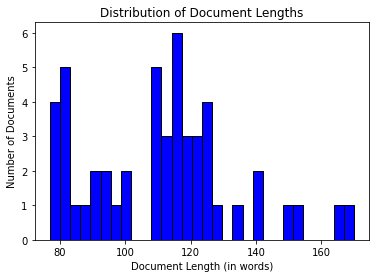

In [40]:
# 2. Text Exploration
print("\nFirst 200 characters of the first 5 documents:")
for i, doc in enumerate(documents[:5]):
    print(f"\nDocument {i + 1}:\n{doc[:200]}...")

# Distribution of document lengths
plt.hist(doc_lengths, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length (in words)')
plt.ylabel('Number of Documents')
plt.show()

Majority of the reports had document lengths between 105 and 130 words

In [41]:
# 3. Common Words and Phrases
all_words = [word.lower() for doc in documents for word in doc.split()]
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

print("\nMost Common Words:")
for word, freq in common_words:
    print(f"{word}: {freq}")

# Most frequent bigrams
bigrams = [(all_words[i], all_words[i + 1]) for i in range(len(all_words) - 1)]
bigram_freq = Counter(bigrams)
common_bigrams = bigram_freq.most_common(10)

print("\nMost Common Bigrams:")
for (word1, word2), freq in common_bigrams:
    print(f"{word1} {word2}: {freq}")


Most Common Words:
of: 290
transaction: 188
a: 152
to: 146
the: 137
number:: 112
and: 112
activity: 65
account: 65
registration: 60

Most Common Bigrams:
registration number:: 60
transaction and: 60
and activity: 58
profile of: 50
date of: 50
basis of: 50
of suspicion: 50
suspicious transaction: 47
1. profile: 41
2. transaction: 41


#### Topic Modelling

Latent Dirichlet Allocation (LDA): It assumes each document is a mix of topics and a topic is a mix of words. LDA tries to map all the documents to the topics in a way such that the words in each document are mostly captured by those imaginary topics.

In [17]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Number of topics
n_topics = 5

# Preprocess text data: Tokenization and vectorization
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(sentences)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(dtm)

# Function to print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        topics.append(message)
    return topics

n_top_words = 10
topic_keywords = print_top_words(lda_model, vectorizer.get_feature_names_out(), n_top_words)
topic_keywords


['Topic #0: transaction, activity, suspicious, 000, description, type, date, 2023, funds, payment',
 'Topic #1: 2023, activity, transaction, paragraph, 000, description, dates, 20xx, 10, customer',
 'Topic #2: number, account, customer, registration, profile, date, tax, opening, entity, identification',
 'Topic #3: transaction, suspicious, report, scenario, ________________________________________, activity, star, str, risk, jurisdiction',
 'Topic #4: suspicion, basis, funds, potential, money, laundering, large, high, layering, raises']

## Work in Progress

#### Naive Bayes

In [18]:
import random

# labeling of data 
labels = ["Suspicious Activity" if "suspicious" in sentence.lower() else "Not Suspicious Activity" for sentence in sentences]

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer_classification = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_train_vec = vectorizer_classification.fit_transform(X_train)
X_test_vec = vectorizer_classification.transform(X_test)

X_train_vec.shape, X_test_vec.shape


((324, 524), (82, 524))

In [19]:
labels[:5]

['Suspicious Activity',
 'Suspicious Activity',
 'Not Suspicious Activity',
 'Not Suspicious Activity',
 'Not Suspicious Activity']

In [20]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report, accuracy_score

# # Training the Naive Bayes classifier
# clf = MultinomialNB()
# clf.fit(X_train_vec, y_train)

# # Predicting on the test set
# y_pred = clf.predict(X_test_vec)

# # Evaluating the model
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# accuracy, classification_rep


In [21]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Training the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test_vec)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(classification_rep).transpose()

# Add accuracy to the DataFrame
report_df.loc['accuracy'] = [accuracy, None, None, None]

report_df


,precision,recall,f1-score,support
Not Suspicious Activity,0.981481,0.981481,0.981481,54.0
Suspicious Activity,0.964286,0.964286,0.964286,28.0
accuracy,0.975610,NaN,NaN,NaN
macro avg,0.972884,0.972884,0.972884,82.0
weighted avg,0.975610,0.975610,0.975610,82.0


#### Text Classification

In [22]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Manually labeling data based on keywords
def assign_label(sentence):
    if "money laundering" in sentence.lower():
        return "Money Laundering"
    elif "terrorism financing" in sentence.lower():
        return "Terrorism Financing"
    elif "proliferation financing" in sentence.lower():
        return "Proliferation Financing"
    else:
        return "Other"

labels_classification = [assign_label(sentence) for sentence in sentences]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sentences, labels_classification, test_size=0.2, random_state=42)

# Vectorizing the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)

# Training a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Making predictions
y_pred = clf.predict(X_test_vec)

# Evaluating the classifier
classification_results = classification_report(y_test, y_pred)
print(classification_results)


                         precision    recall  f1-score   support

       Money Laundering       0.00      0.00      0.00         4
                  Other       0.93      1.00      0.96        76
Proliferation Financing       0.00      0.00      0.00         1
    Terrorism Financing       0.00      0.00      0.00         1

               accuracy                           0.93        82
              macro avg       0.23      0.25      0.24        82
           weighted avg       0.86      0.93      0.89        82



c:\Users\Rick-Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rick-Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rick-Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [23]:
def categorize_report(report):
    # Define keywords for each category
    ml_keywords = ["money laundering", "laundered funds", "illegal transfer"]
    tf_keywords = ["terrorism financing", "terrorist funds", "terror financing"]
    pf_keywords = ["proliferation financing", "weapons of mass destruction", "nuclear financing"]

    # Check the presence of keywords in the report
    if any(keyword in report.lower() for keyword in ml_keywords):
        return "Money Laundering (ML)"
    elif any(keyword in report.lower() for keyword in tf_keywords):
        return "Terrorism Financing (TF)"
    elif any(keyword in report.lower() for keyword in pf_keywords):
        return "Proliferation Financing (PF)"
    else:
        return "Uncategorized"

# Test with a sample report
sample_report = "This is a suspicious transaction related to terrorist funds and activities."
categorization = categorize_report(sample_report)
print(categorization)


Terrorism Financing (TF)
